# Data Generation using Modelling and Simulation for Machine Learning

## Simulation Tool Used
After exploring the list of computer simulation software from Wikipedia,
different simulators such as NetLogo, SimPy and ns-3 were studied.
Gymnasium (CartPole) simulator was selected because:

1. It is open-source
2. Python based
3. Easy integration with Machine Learning
4. Suitable for generating simulation data

In [19]:
!pip install gymnasium
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

In [20]:
import gymnasium as gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## CartPole Parameters and Bounds

| Parameter | Lower Bound | Upper Bound |
|---|---|---|
| cart position | -4.8 | 4.8 |
| cart velocity | -3 | 3 |
| pole angle | -0.418 | 0.418 |
| pole velocity | -3 | 3 |

In [21]:
env = gym.make("CartPole-v1")

low = [-4.8, -3, -0.418, -3]
high = [4.8, 3, 0.418, 3]

In [22]:
def generate_random_state():
    state = []
    for i in range(4):
        value = random.uniform(low[i], high[i])
        state.append(value)
    return state

In [23]:
data = []

for i in range(1000):

    state = generate_random_state()

    env.reset()

    env.unwrapped.state = np.array(state)

    action = random.choice([0,1])

    next_state, reward, terminated, truncated, info = env.step(action)

    row = state + [action, reward]

    data.append(row)

In [24]:
columns = [
    "cart_position",
    "cart_velocity",
    "pole_angle",
    "pole_velocity",
    "action",
    "reward"
]

df = pd.DataFrame(data, columns=columns)

df.head()

,cart_position,cart_velocity,pole_angle,pole_velocity,action,reward
0,1.458374,-1.280631,-0.220593,-1.791568,0,1.0
1,-0.901487,1.347896,0.214493,2.795784,0,1.0
2,-4.613465,1.258752,-0.369143,1.419164,1,1.0
3,-2.535547,0.430598,-0.401833,-0.514590,0,1.0
4,3.156272,-1.850912,0.247470,0.504343,1,1.0


In [25]:
df.to_csv("simulation_data.csv", index=False)

## Machine Learning Model Comparison

Goal:
Predict the action taken using simulation parameters.

In [26]:
X = df.drop("action", axis=1)
y = df["action"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)

    results.append([name, acc])

In [29]:
result_df = pd.DataFrame(results, columns=["Model","Accuracy"])

result_df

,Model,Accuracy
0,Logistic Regression,0.470
1,Decision Tree,0.520
2,Random Forest,0.510
3,KNN,0.475
4,SVM,0.495


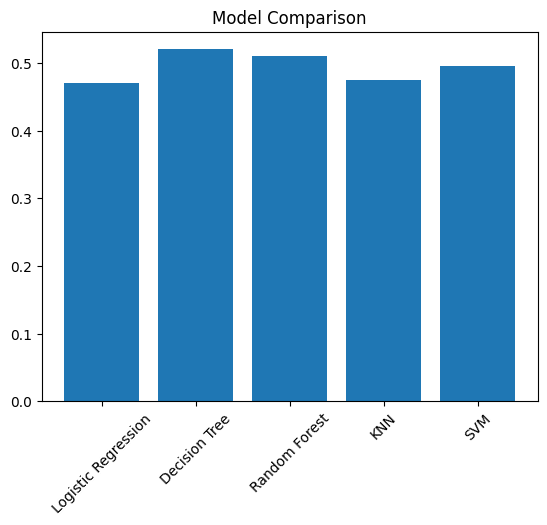

In [30]:
plt.figure()

plt.bar(result_df["Model"], result_df["Accuracy"])

plt.xticks(rotation=45)

plt.title("Model Comparison")

plt.show()

In [31]:
best_model = result_df.sort_values("Accuracy", ascending=False).iloc[0]

print("Best Model:")
print(best_model)

Best Model:
Model       Decision Tree
Accuracy             0.52
Name: 1, dtype: object


## Conclusion

1000 simulations were generated using CartPole simulator.
Multiple ML models were trained and evaluated using accuracy.
The model with highest accuracy is selected as the best model.